In [1]:
#Add Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
from citipy import citipy
import gmaps
import gmaps.datasets
import scipy.stats as stats
from datetime import datetime
import folium
import folium.plugins as plugins
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import pyproj
import sys

## Importing CSV Data



In [2]:
#Import citation data from csv
citation_raw = pd.read_csv("Parking_Citations.csv")
citation_df = citation_raw

C:\Users\walke\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Name of columns 
#citation_df.columns.tolist()

## Cleaning Columns from Dataset

In [4]:
#Drop columns that are not needed
citation_df1 = citation_df.drop(["Meter Id","Marked Time","RP State Plate","Plate Expiry Date","VIN","Location","Route","Agency","Violation code","Body Style", "Violation Description", "Fine amount"], axis = 1)
citation_df1.head()

#Drop Lat and Lon = 99999
citation_df2 = citation_df1[(citation_df1["Latitude"] !=99999.000) & (citation_df1["Longitude"] !=99999.000)]
citation_df2.head()


,Ticket number,Issue Date,Issue time,Make,Color,Latitude,Longitude
0,1114684152,5/1/2018,1310.0,GMC,BK,6468879.186,1841441.836
39,1121020504,5/1/2018,1100.0,CHEV,SI,6487917.292,1830966.052
41,1116268053,5/1/2018,1211.0,SUBA,RE,6443160.675,1921957.696
45,1117163961,5/1/2018,1045.0,TOYO,BK,6401115.821,1887444.261
46,1117163950,5/1/2018,2135.0,TOYO,GY,6397793.249,1886756.686


In [5]:
citation_df2.count()

Ticket number    419378
Issue Date       419378
Issue time       419303
Make             419187
Color            419316
Latitude         419377
Longitude        419377
dtype: int64

In [6]:
#Take all rows where column values are not equal to zero
citation_df3 = citation_df2[(citation_df2[["Ticket number", "Issue Date","Issue time","Make","Color","Latitude","Longitude",]] != 0)]
citation_df3.head()

,Ticket number,Issue Date,Issue time,Make,Color,Latitude,Longitude
0,1114684152,5/1/2018,1310.0,GMC,BK,6468879.186,1841441.836
39,1121020504,5/1/2018,1100.0,CHEV,SI,6487917.292,1830966.052
41,1116268053,5/1/2018,1211.0,SUBA,RE,6443160.675,1921957.696
45,1117163961,5/1/2018,1045.0,TOYO,BK,6401115.821,1887444.261
46,1117163950,5/1/2018,2135.0,TOYO,GY,6397793.249,1886756.686


In [7]:
#Drop all rows with blank cells
citation_df4 = citation_df3.fillna("")

In [8]:
#citation_df4.count()

In [9]:
citation_df4["Make"].replace("", np.nan, inplace=True)
citation_df4.dropna(subset = ["Make"], inplace = True)

In [10]:
#Sort values by make of car
#citation_df4.sort_values(["Make"],ascending=True)

In [11]:
Sample_data = citation_df4.sample(frac=0.10, random_state = 1 )

In [12]:
Sample_data.head()

,Ticket number,Issue Date,Issue time,Make,Color,Latitude,Longitude
411923,4336360221,7/13/2018,2332,TOYT,BL,6.42472e+06,1.80822e+06
143651,4332707271,5/24/2018,2204,SUBA,WT,6.46008e+06,1.85883e+06
275230,4334502561,6/18/2018,1209,BMW,WT,6.37875e+06,1.8836e+06
272531,4333701352,6/17/2018,2125,HOND,BK,6.45809e+06,1.85907e+06
140789,4333176363,5/24/2018,1646,OTHR,BN,6.48442e+06,1.83663e+06


In [13]:
#Replace duplicates for all makes in top 30
citation_df4["Make"] = citation_df4["Make"].replace({'TOYT': 'TOYOTA', 'TOYO': 'TOYOTA'})
citation_df5 = citation_df4["Make"].value_counts()
citation_df6 = citation_df5.rename_axis('Make').reset_index(name='counts')
citation_df7 = citation_df6.head(25)

In [14]:
citation_df7.head()

,Make,counts
0,TOYOTA,73826
1,HOND,47652
2,FORD,35206
3,NISS,31743
4,CHEV,27727


bar_order = citation_df7.sort_values("counts")

C:\Users\walke\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\walke\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


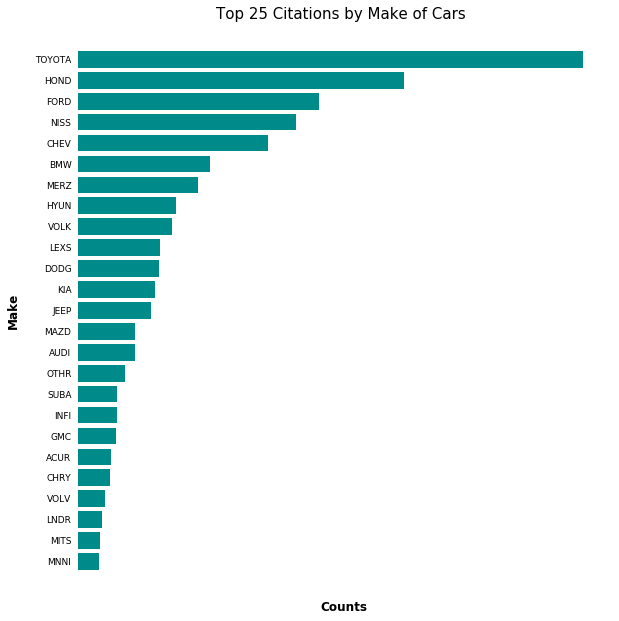

<Figure size 432x288 with 0 Axes>

In [15]:
#Bar plot for top 25 make of vehicles that got citations
fig = plt.gcf()
fig.set_size_inches(9.5, 10.5)
y_axis=np.arange(len(citation_df7["Make"]))
citation_df7.sort_values('counts',inplace=True)
plt.barh(y_axis,citation_df7["counts"], color="darkcyan", align="center",
         edgecolor="none",)

#Set labels
plt.ylabel('Make', fontsize=12, labelpad=15, weight="bold")
plt.xlabel('Counts', fontsize=12, labelpad=5, weight="bold")

#Edit ticks
plt.tick_params(axis="both", which="both", bottom="False", top="False", labelbottom="False", left="False", right="False", labelleft="True")
plt.yticks(y_axis, citation_df7["Make"], fontsize=9, rotation=360,)
plt.xticks(fontsize=10)

# get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)


plt.title('Top 25 Citations by Make of Cars ', fontsize=15)
fig.savefig("make_chart.png")
plt.show()
plt.clf()
plt.show()

In [16]:
#Replace duplicates for all makes in top 30
citation_df8 = citation_df4["Color"].value_counts()
citation_df9 = citation_df8.rename_axis('Color').reset_index(name='Counts')
citation_df10 = citation_df9.head(10)

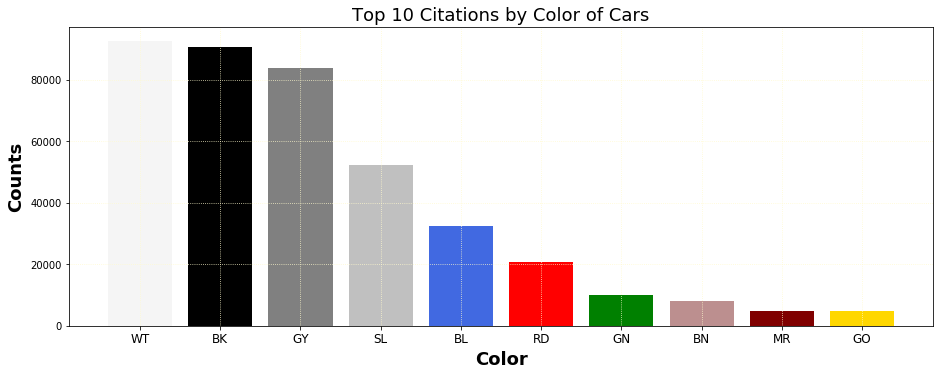

<Figure size 432x288 with 0 Axes>

In [17]:
#Bar plot for top 25 Color of vehicles that got citations
fig = plt.gcf()
fig.set_size_inches(15.5, 5.5)
x_axis=np.arange(len(citation_df10["Color"]))
plt.bar(x_axis,citation_df10["Counts"], color=('whitesmoke','black',"grey","silver","royalblue","red","green","rosybrown","maroon","gold","red","tan"))

#Set labels
plt.xlabel('Color', fontsize=18, labelpad=5, weight="bold")
plt.ylabel('Counts', fontsize=18, labelpad=5, weight="bold")

#Edit ticks
plt.xticks(x_axis, citation_df10["Color"], fontsize=12, rotation="horizontal")
plt.title('Top 10 Citations by Color of Cars', fontsize=18)

#plt.figure(figsize=(18,16))
plt.grid( which="major",linestyle="dotted", color="lemonchiffon")
plt.rcParams['axes.facecolor'] = 'burlywood'
fig.savefig("color_chart.png")

plt.show()
plt.clf()


In [18]:
plt.clf()

<Figure size 432x288 with 0 Axes>

In [19]:
# Sampling the models of four cars 
df1 = Sample_data[Sample_data.Make.isin(["BMW","FORD","VOLK","DODG"])]
df1.head()

,Ticket number,Issue Date,Issue time,Make,Color,Latitude,Longitude
275230,4334502561,6/18/2018,1209,BMW,WT,6.37875e+06,1.8836e+06
123283,4333349086,5/22/2018,257,BMW,BK,6.45597e+06,1.82743e+06
141528,4333111554,5/24/2018,1119,FORD,WT,6.44513e+06,1.84288e+06
461871,4334551745,7/23/2018,1008,BMW,BK,6.45501e+06,1.85367e+06
325517,4334289783,6/26/2018,1219,FORD,WT,6.45788e+06,1.85907e+06


In [20]:
# Group by make of the cars
df2 = df1.groupby("Make").Make.count()

In [21]:
Sample_data_large = citation_df4.sample(frac=0.50, random_state = 1 )

In [22]:
df3 = Sample_data_large[Sample_data_large.Make.isin(["BMW","FORD","VOLK","DODG"])]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39837 entries, 275230 to 411751
Data columns (total 7 columns):
Ticket number    39837 non-null object
Issue Date       39837 non-null object
Issue time       39837 non-null object
Make             39837 non-null object
Color            39837 non-null object
Latitude         39837 non-null object
Longitude        39837 non-null object
dtypes: object(7)
memory usage: 2.4+ MB


In [23]:
df3 = df3.groupby("Make").Make.count()
df3

Make
BMW      9678
DODG     5885
FORD    17511
VOLK     6763
Name: Make, dtype: int64

In [24]:
Observed = df2
Observed

Make
BMW     1972
DODG    1146
FORD    3464
VOLK    1323
Name: Make, dtype: int64

In [25]:
Observed = pd.DataFrame(Observed)
Observed

,Make
Make,
BMW,1972
DODG,1146
FORD,3464
VOLK,1323


In [26]:
Observed.columns.values[0]="Observed"
Observed

,Observed
Make,
BMW,1972
DODG,1146
FORD,3464
VOLK,1323


In [27]:
overall_ratio = (df3/len(df3)).round(0)
overall_ratio

Make
BMW     2420.0
DODG    1471.0
FORD    4378.0
VOLK    1691.0
Name: Make, dtype: float64

In [28]:
Expected = overall_ratio * len(Observed)
Expected

Make
BMW      9680.0
DODG     5884.0
FORD    17512.0
VOLK     6764.0
Name: Make, dtype: float64

In [29]:
Expected= pd.DataFrame(Expected)

In [30]:
Expected.columns.values[0] = "Expected"
Expected

,Expected
Make,
BMW,9680.0
DODG,5884.0
FORD,17512.0
VOLK,6764.0


In [31]:
Combined =  pd.concat([Observed, Expected], axis = 1)
Combined

,Observed,Expected
Make,,
BMW,1972,9680.0
DODG,1146,5884.0
FORD,3464,17512.0
VOLK,1323,6764.0


In [32]:
#With four raws, the degree of freedom is 3
# with a p-value of 0.05, the CL is 1-0.05 = 0.95
Critcal_value = stats.chi2.ppf(q=0.95, df = 3)
Critcal_value

7.814727903251179

In [33]:
stats.chisquare(Combined["Observed"], Combined["Expected"])

Power_divergenceResult(statistic=25598.91059996524, pvalue=0.0)

# DMV Data



In [34]:
#Import citation data from csv
dmv_raw = pd.read_csv("VehicleCount_070118.csv")
dmv_df = dmv_raw

In [35]:
#Take needed columns only
dmv_df1=dmv_df[["Make", "Vehicles"]]

#Get total number of vehicles for each make
dmv_df2=dmv_df1.groupby(["Make"]).sum()

#Sort for top 25
dmv_df2 = dmv_df2.sort_values(["Vehicles"], ascending=False)

#Get top 25
dmv_df3 = dmv_df2.head(25).reset_index()
dmv_df3

,Make,Vehicles
0,TOYOTA,5457492
1,FORD,3479184
2,HONDA,3459848
3,OTHER/UNK,3377081
4,CHEVROLET,2787313
5,NISSAN,1906919
6,DODGE,989746
7,MERCEDES-BENZ,850555
8,LEXUS,848210
9,BMW,832846


In [36]:
#Rename makes to tie DMV data to citation data
dmv_df3["Make"]=dmv_df3["Make"].replace({'HONDA': 'HOND', 'CHEVROLET': 'CHEV', 'NISSAN': 'NISS','DODGE': 'DODG',
                                 'MERCEDES-BENZ': 'MERZ','LEXUS': 'LEXS','MAZDA': 'MAZD','HYUNDAI': 'HYUN',
                                'SUBARU': 'SUBA','ACURA': 'ACUR','INFINITI': 'INFI',
                                'OTHER/UNK': 'OTHR','VOLVO': 'VOLV','MITSUBISHI': 'MITS',
                                'CHRYSLER': 'CHRY',
                                'VOLKSWAGEN': 'VOLK',
                                })
#dmv_df3

In [37]:
#Check for makes in top 25 in both DMV and Citation 
pd.merge(dmv_df3,citation_df7,how="inner")

,Make,Vehicles,counts
0,TOYOTA,5457492,73826
1,FORD,3479184,35206
2,HOND,3459848,47652
3,OTHR,3377081,6771
4,CHEV,2787313,27727
5,NISS,1906919,31743
6,DODG,989746,11718
7,MERZ,850555,17462
8,LEXS,848210,11920
9,BMW,832846,19230


In [38]:
# Set Los Angeles base coordinates for center of city
laCoords = 34.0522, -118.2437
# Create base map of Los Angeles
m = folium.Map(location= laCoords, zoom_start=10)
# print map to verify working
m

In [39]:
# clean up the lat / Lon from x/y to lat / lon
pm = '+proj=lcc +lat_1=34.03333333333333 +lat_2=35.46666666666667 +lat_0=33.5 +lon_0=-118 +x_0=2000000 +y_0=500000.0000000002 +ellps=GRS80 +datum=NAD83 +to_meter=0.3048006096012192 +no_defs'
x1m,y1m = citation_df2['Latitude'].values, citation_df2['Longitude'].values
x2m,y2m = pyproj.transform(pyproj.Proj(pm,preserve_units = True), pyproj.Proj("+init=epsg:4326"), x1m,y1m)
citation_df2['Latitude']=x2m
citation_df2['Longitude']=y2m

C:\Users\walke\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\walke\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [48]:
mc = MarkerCluster()
# Set a sample of the over all dataframe
subdf = citation_df2[(citation_df2['Longitude'].notnull())].loc[1:1000,:]
subdf.head()
#creating a Marker for each point in of a citation. Each point will get a popup with their zip
for row in subdf.itertuples():
    mc.add_child(folium.Marker(location=[row.Latitude,  row.Longitude])) 
m.add_child(mc)
# Reset the index and drop dups if any
citation_df2.reset_index(inplace=True, drop=True)
subdf = citation_df2[(citation_df2['Longitude'].notnull())].loc[1:10000,:]
# Display the head of the dataframe
subdf.head()

,Ticket number,Issue Date,Issue time,Make,Color,Latitude,Longitude
1,1121020504,5/1/2018,1100.0,CHEV,SI,-118.243396,34.023347
2,1116268053,5/1/2018,1211.0,SUBA,RE,-118.392270,34.272990
3,1117163961,5/1/2018,1045.0,TOYO,BK,-118.530835,34.177622
4,1117163950,5/1/2018,2135.0,TOYO,GY,-118.541807,34.175684
5,1117162255,5/1/2018,1605.0,CHEV,GY,-118.530838,34.179413


In [49]:
# create empty map zoomed in on San Francisco
someMap = folium.Map(location=laCoords, zoom_start=10) 
# add a marker for every record in the filtered data, use a clustered view
FastMarkerCluster(data=list(
    zip(subdf['Longitude'],
        subdf['Latitude']
       ))).add_to(someMap)
folium.LayerControl().add_to(someMap)
someMap.save('citaClustermap.html')
# display the map
display(someMap)

In [50]:
# sys.setrecursionlimit(150000)
data_heat = subdf[['Longitude', 'Latitude']].values.tolist()
# sys.setrecursionlimit(1500)
someMapHeat = folium.Map(location=laCoords, zoom_start=10) 
plugins.HeatMap(data_heat).add_to(someMapHeat)
# save the map as a html
someMapHeat.save('heatmap.html')
# display the map
someMapHeat

In [51]:
# Creat Locations of Resturants as overlay of map
laRestLoc = pd.read_csv('ResturantData.csv')
restDF = laRestLoc[(laRestLoc['Lat'].notnull())].loc[1:100,:]
restDF.head()

,Account Number,Lat,Long
1,0003008665-0001-4,34.0569,-118.0208
2,0003008969-0001-7,33.5948,-117.6999
3,0002982497-0001-0,34.0440,-118.2920
4,0003007720-0001-8,34.1164,-118.3165
5,0002495059-0001-2,34.0101,-118.3416


In [52]:
#creating a Marker for each point in of a citation. Each point will get a popup with their zip
for row in restDF.itertuples():
    mc.add_child(folium.Marker(location=[row.Lat,  row.Long], icon=folium.Icon(color='red'))) 
m.add_child(mc)